# Исследование стартапов
- Автор: Егорова Ольга

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. 

В распоряжении компании имеются исторические данные, исследование которых может быть полезным. Однако данные неполны, поэтому в процессе исследования требуется аккуратно относиться к получаемым значениям показателей и выводам и оценивать их на возможные искажения

## Цели проекта

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса:
* по каким столбцам можно объединять данные из разных таблиц;
* можно ли доверять данным о сотрудниках стартапов и их образовании;
* что означают покупки за 0 или за 1 доллар;
* какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой.

## Описание данных

### Таблица `acquisition`
содержит информацию о покупках одними компаниями других компаний:

- `id` — идентификатор покупки.  
- `acquiring_company_id` — идентификатор покупающей компании.  
- `acquired_company_id` — идентификатор покупаемой компании.  
- `term_code` — варианты расчёта.  
- `price_amount` — сумма сделки.  
- `acquired_at` — дата сделки.

### Таблица `company_and_rounds`
содержит информацию о компаниях и раундах финансирования:  

- `company ID` — идентификатор компании.   
- `name` — название компании.  
- `category code` — категория области деятельности компании.  
- `status` — статус компании.  
- `founded at` — дата инвестирования.  
- `closed at` — дата закрытия компании.  
- `domain` — официальный сайт компании.  
- `network username` — ник компании в сети.  
- `country code` — код страны компании.  
- `investment rounds` — число инвестиционных раундов.
  >Инвестиционный раунд — это этап привлечения средств на развитие бизнеса. При делении на этапы учитывается стадия развития компании. Для каждой стадии характерен свой диапазон оценок и свой тип инвестора. 
- `funding rounds` — число раундов финансирования.  
- `funding total` — сумма финансирования.  
- `milestones` — вехи финансирования.
  >Веха финансирования — это контрольная точка, которая отмечает завершение значимой стадии или достижение важного результата в процессе финансирования проекта.
- `funding round id` — идентификатор этапа финансирования.  
- `company id` — идентификатор компании.  
- `funded at` — дата финансирования.  
- `funding round type` — тип финансирования.  
- `raised amount` — сумма финансирования.  
- `pre money valuation` — предварительная денежная оценка.  
- `participants` — число участников.  
- `is first round` — является ли раунд первым.  
- `is last round` — является раунд последним.  

### Таблица `education`
содержит информацию об образовании сотрудника:

- `id` — идентификатор записи об образовании.  
- `person_id` — идентификатор работника.  
- `instituition` — название учебного заведения.  
- `graduated_at` — дата получения образования.  

### Таблица `people`
содержит информацию о сотрудниках:  

- `id` — идентификатор сотрудника.  
- `first_name` — имя сотрудника.  
- `last_name`— фамилия сотрудника.  
- `company_id` — идентификатор компании.  
- `network_username` — ник в социальных сетях.  

### Таблица `degrees`
содержит информацию о типе образования сотрудника:  

- `id` — идентификатор записи.  
- `object_id` — идентификатор сотрудника.  
- `degree_type` — тип образования.  
- `subject` — специальность.  

### Таблица `fund` 
содержит информацию о фондах:

- `id` — идентификатор фонда.  
- `name` — название фонда.   
- `category_code` — категория области деятельности компании.  
- `founded_at` — дата создания фонда.  
- `domain` — сайт фонда.  
- `network_username` — ник фонда в сети.  
- `country_code` — код страны фонда.  
- `investment_rounds` — число инвестиционных раундов.  
- `invested_companies` — число профинансированных компаний.  
- `milestones` — вехи финансирования.  

### Таблица `investment`
содержит информацию о раундах инвестирования:  

- `id` — идентификатор этапа инвестирования.  
- `funding_round_id` — идентификатор раунда инвестирования.  
- `company_id` — индентификатор компании.  
- `funding_round_type` — тип финансирования.  
- `fund_id` — идентификатор фонда.  

## План работы
1. Загрузка и знакомство с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

--------------------------

## Загрузка данных
Загружаем необходимые библиотеки для анализа данных и данные датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Выгружаем данные
url1 = 'https://drive.google.com/uc?export=download&id=1ba2lktMODVDh7fn5m9utd9Cu0z4fvQc7'
url2 = 'https://drive.google.com/uc?export=download&id=1eEeeDNxLc3XBwWz0vTA38rdr-Ez2yQ5X'
url3 = 'https://drive.google.com/uc?export=download&id=1g4KiEryq2Qbko6YaU0ZWa6Vj9wAUSw7m'
url4 = 'https://drive.google.com/uc?export=download&id=1NkRHHSOqkYZGv8rjL4mNWDalvzxxtISL'
url5 = 'https://drive.google.com/uc?export=download&id=1Fykr1lB4_105zvhGmN_O1KeqQzMhdD7b'
url6 = 'https://drive.google.com/uc?export=download&id=1yK6bRttp2_pdAxpQPQYgV7ptm21TDyLx'

company_and_rounds_df = pd.read_csv(url1)
acquisition_df = pd.read_csv(url2)
people_df = pd.read_csv(url3)
education_df = pd.read_csv(url4)
degrees_df = pd.read_csv(url5)
fund_df = pd.read_csv(url6)

## Знакомство с данными

### Проверка корректности названий столбцов

In [3]:
# Выводим метки столбцов с помощью атрибута columns
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [4]:
# Выводим метки столбцов с помощью атрибута columns
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [5]:
# Выводим метки столбцов с помощью атрибута columns
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [6]:
# Выводим метки столбцов с помощью атрибута columns
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [7]:
# Выводим метки столбцов с помощью атрибута columns
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

**Имена столбцов датафрейма `company_and_rounds_df` необходимо преобразовать в `snake_case`. Столбцы остальных датафреймов корректны**

### Преобразование названий столбцов
Преобразуем названия столбцов датафрейма `company_and_rounds_df` к типу `snake_case`. Оставим только временно заглавные буквы в столбце `company ID`. Для этого создадим список с новыми названиями и передадим его атрибуту `columns`

In [8]:
# Получаем список названий столбцов
columns_list = company_and_rounds_df.columns.tolist()

In [9]:
# Создаем новый список
columns_list_new = []
for column in columns_list:
    # Делим каждый элемент списка по пробелам
    col = column.split()
    # Объединяем с разделителем'_'
    column = '_'.join(col)
    # Записываем элемент column в новый список
    columns_list_new.append(column)

# Выводим новый список
columns_list_new

['company_ID',
 'name',
 'category_code',
 'status',
 'founded_at',
 'closed_at',
 'domain',
 'network_username',
 'country_code',
 'investment_rounds',
 'funding_rounds',
 'funding_total',
 'milestones',
 'funding_round_id',
 'company_id',
 'funded_at',
 'funding_round_type',
 'raised_amount',
 'pre_money_valuation',
 'participants',
 'is_first_round',
 'is_last_round']

In [10]:
# Передаем список с новыми названиями атрибуту columns
company_and_rounds_df.columns = columns_list_new

In [11]:
# Проверим результат преобразования
company_and_rounds_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

**Названия столбцов датафрейма `company_and_rounds_df` приведены к типу `snake_case`.**

### Получение информации о датафреймах
Получим краткую сводку о датафреймах с помощью `info()` и основную статистику с помощью метода `describe()`, количество пропусков `.isna().sum()`, количество уникальных значений `nunique()`

#### Датафрейм `company_and_rounds_df`

In [12]:
# Выведем первые записи
company_and_rounds_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Получаем краткую сводку
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [14]:
#Получаем количество пропусков
company_and_rounds_df.isna().sum()

company_ID                302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [15]:
#Получаем количество пропусков во всем датафрейме
print('Общее число пропусков в датафрейме "company_and_rounds_df":')
company_and_rounds_df.isna().sum().sum()

Общее число пропусков в датафрейме "company_and_rounds_df":


2184030

In [16]:
#Получаем основные статистики по текстовым столбцам
company_and_rounds_df.describe(include='object')

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,funded_at,funding_round_type
count,217471,143886,217472,109956,3449,147159,95534,108607,52680,52928
unique,196505,42,4,6156,925,125498,79571,175,3399,9
top,Tyro Payments,software,operating,2010-01-01,2013-06-01,placeshilton.com,Goodman_UK,USA,2012-01-01,venture
freq,15,20759,200486,4570,229,44,20,68089,462,15342


In [17]:
# Получаем основные статистики по числовым столбцам
company_and_rounds_df.describe(percentiles=[0.05, 0.75, 0.99])

,company_ID,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
count,217472.000000,217472.000000,217472.000000,2.174720e+05,217472.000000,52928.000000,52928.000000,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
mean,145287.383723,0.037711,0.612171,5.996191e+06,0.650442,28962.894536,98490.888433,7.946092e+06,3.294525e+05,1.528567,0.604576,0.604538
std,91998.156087,1.962712,1.433500,4.893160e+07,0.826408,16821.871803,88429.084864,4.216821e+07,6.531803e+07,2.060192,0.488946,0.488954
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
5%,9878.550000,0.000000,0.000000,0.000000e+00,0.000000,2906.350000,1767.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,165262.500000,0.000000,0.000000,0.000000e+00,0.000000,28885.500000,58080.000000,1.600000e+06,0.000000e+00,1.000000,1.000000,1.000000
75%,228199.250000,0.000000,0.000000,0.000000e+00,1.000000,43561.250000,171610.750000,6.700000e+06,0.000000e+00,2.000000,1.000000,1.000000
99%,283526.290000,1.000000,7.000000,1.091775e+08,3.000000,57400.730000,282376.680000,9.228400e+07,0.000000e+00,9.000000,1.000000,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000,57952.000000,286215.000000,3.835050e+09,1.500000e+10,36.000000,1.000000,1.000000


In [18]:
#Получаем количество уникальных значений столбцов
company_and_rounds_df.nunique()

company_ID             196553
name                   196505
category_code              42
status                      4
founded_at               6156
closed_at                 925
domain                 125498
network_username        79571
country_code              175
investment_rounds          42
funding_rounds             16
funding_total            9483
milestones                 10
funding_round_id        52928
company_id              31939
funded_at                3399
funding_round_type          9
raised_amount           10266
pre_money_valuation        27
participants               32
is_first_round              2
is_last_round               2
dtype: int64

**Датафрейм `company_and_rounds_df`**  
- содержит 22 столбца и 217774 строки;
- названия столбцов корректные вида `snake_case`, кроме `company_ID`;
- пропуски имеются в каждом столбце;
- столбцов со строковыми данными `object` - 10;
- столбцов с числовыми значениями с плавающей точкой `float64` - 12;


- `company_ID` содержит 217472 значений. Значения столбца не уникальны, поскольку одна и та же компания могла быть профинансирована не один раз. 302 строки не содержат данные. Минимальное значение  1, максимальное 286215. Значения можно преобразовать к целочисленному типу `Int`.
-  `company_id` вероятнее всего дублирует часть данных столбца `company_ID`. Это те компании, для которых есть подробные данные о финансировании. Похоже, что этот датафрей был образован объединением двух других по столбцам с id и оба столбца были оставлены. 
- `name` содержит 217471 значений. Аналогично предыдущему пункту значения столбца не уникальны. Количество уникальных 196505. Самая частовстречающаяся компания "Tyro Payments" встречается 15 раз. 303 строки не содержат данные. Тип данных `object` корректен.
- `category_code` содержит данные категорий области деятельности компании. Количество уникальных категорий 42. Самая популярная категория "software" встречается 20759 раз. Всего значений в столбце 143886. Количество пропускав 73888. Тип данных `object` корректен.
- `status` содержит данные о статусе компании. Cодержит 217472 значений. 302 строки не содержат данные. Самый популярный статус "operating" встречается  200486 раз.  Количество значений столбца ограничено и равно 4, поэтому можно изменить тип данных с `object` на `category`. 
- `founded_at` содержит не инфорацию о дате инвестирования, как указано в описании, а дату основания компании. 109956 значений. 107818 строки не содержат данные, что вероятно может говорить об ошибке данных. Тип данных необходимо изменить с `object` на `datetime64`.
- `closed_at` содержит даты о закрытии компаний. Значений в столбце 3449. 214325 строки не содержат данные, вероятно говорит о том. что компании не закрыты. Тип данных необходимо изменить с `object` на `datetime64`.
- `domain` содержит адреса сайтов компаний. 147159  значений. 70615 строк не содержат данные. Самый популярный домен "placeshilton.com" всречается 44 раза. Вероятно компания, которой принадлежит этот домен так же должна встречаться в датафрейме как минимум 44 раза. Но самая популярная компания Tyro Payments встречается лишь 15 раз. Значит либо для этого домена нет данных (пропуск в поле `name`), либо у некоторых компаний может быть один и тот же домен. Тип данных `object` корректен.
- `network_username` ник компании в сети. Всего  95534 значений, при этом 122240 строки не содержат данные. Тип данных `object` корректен.
- `country_code` код страны указан для 108607 строк, 109167 строки не содержат данные. Всего 175 уникальных значений. Самая популярная "USA",  встречается 68089 раз. Тип данных `object` корректен.
- `investment_rounds`число инвестиционных раундов указано для 217472 строк, 302 строки не содержат данные. Минимальное значение 0, максимальное 478.  Значения можно преобразовать к целочисленному типу `Int`.
- `funding_rounds` число раундов финансирования указано для 217472 строк, 302 строки не содержат данные.  Минимальное значение 0, максимальное 15.  Значения можно преобразовать к целочисленному типу `Int`.
- `funding_total`сумма финансирования указана для 217472 строк, 302 строки не содержат данные. Минимальное значение 0, максимальное 5,7*10^9. Тип данных `float64` корректен.
- `milestones` вехи финансирования указаны для 217472 строк, 302 строки не содержат данные. Минимальное значение 0, максимальное 9. Тип данных `float64` можно преобразовать к целочисленному типу `Int`.
- `funding_round_id` идентификатор этапа финансирования указан для 52928 строк, 164846 строки не содержат данные. Минимальное значение 0, максимальное 9. Тип данных `float64` можно преобразовать к целочисленному типу `Int`.
- `funded_at` дата финансирования указана для 52680 строк, 165094 строки не содержат данные. Тип данных необходимо изменить с `object` на `datetime64`.
- `funding_round_type` идентификатор этапа финансирования указана для 52928 строк, 165094 строки не содержат данные. В столбце всего 9 уникальных значений. Поскольку количество значений столбца ограничено, можно изменить тип данных с `object` на `category` или оставить без изменения.
- `raised_amount` сумма финансирования указана для 52928 строк. Минимальное значение 0 (возможно связано с этапом финансирования, когда сумма еще не выплачена или было отказано в финансировании) , максимальное 3.83505 * 10^9. Тип данных `float64` корректен.
- `pre_money_valuation` предварительная денежная оценка указана для 52928 строк. 99% строк содержат минимальное значение 0 , максимальное 1,5 * 10^10. Тип данных `float64` корректен
- `participants` число участников указано для 52928 строк. Минимальное значение 0 , максимальное 36. Тип данных `float64` корректней преобразовать к целочисленному типу `Int`.
- `is_first_round` отметка является ли раунд первым и `is_last_round` отметка является ли раунд последним указаны для 52928 строк. Принимают значения 0 и 1. Тип данных `float64`  можно преобразовать к целочисленному типу `Int`.

#### Датафрейм `acquisition_df`

In [19]:
# Посмотрим первые строки
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [20]:
#Получаем краткую сводку
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [21]:
#Получаем основные статистики
acquisition_df.describe(percentiles=[0.05, 0.95], include='all')

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
count,9407.000000,9407.000000,9407.000000,1831,9.407000e+03,9378
unique,NaN,NaN,NaN,3,NaN,2627
top,NaN,NaN,NaN,cash,NaN,2008-05-01
freq,NaN,NaN,NaN,1195,NaN,56
mean,5256.981822,49787.284575,71693.030722,NaN,3.932965e+08,NaN
std,3005.794674,69060.422026,73026.433729,NaN,2.682198e+10,NaN
min,1.000000,4.000000,4.000000,NaN,0.000000e+00,NaN
5%,595.300000,59.000000,1833.300000,NaN,0.000000e+00,NaN
50%,5178.000000,26107.000000,45126.000000,NaN,0.000000e+00,NaN
95%,10013.700000,227756.500000,243288.500000,NaN,3.577000e+08,NaN


In [22]:
# Выводим количество пропусков
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [23]:
# Выводим количество пропусков
acquisition_df.isna().sum().sum()

7605

**Датафрейм `acquisition_df`**  
- содержит 6 столбцов и 9407 строк;
- названия столбцов корректные вида `snake_case`;
- пропуски имеются в столбцах `term_code` (7576)  и `acquired_at` (29);
- столбцов со строковыми данными (object) - 2;
- столбцов с числовыми значениями  (int64) - 4;
- в столбце с суммой сделки `price_amount` лишь 5% данных имеют не нулевые значения
- столбец c вариантами расчета `term_code` содержит 3 уникальных значения. Можно изменить тип данных с `object` на `category` или оставить без изменений
- столбец acquired_at содержит дату сделки, поэтому тип необходимо изменить с `object` на `datetime64`.

#### Датафрейм `people_df`

In [24]:
#Выводим первые строки
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [25]:
#Получаем краткую сводку
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [26]:
#Находим количество уникальных
people_df.nunique()

id                  226708
first_name           28421
last_name           107771
company_id           22922
network_username     38421
dtype: int64

In [27]:
#Находим количество пропусков
people_df.isna().sum()

id                       0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [28]:
# Найдем строки, которые имеют одинаковые id
people_df[people_df['id'].duplicated(keep=False)]

,id,first_name,last_name,company_id,network_username
13171,116554,Nicole,Couto,200243.0,NaN
13172,116554,Nicole,Couto,212993.0,NaN


**Датафрейм `people_df`**  
- содержит 5 столбцов и 226709 строк;
- названия столбцов корректные вида `snake_case`;
- пропуски имеются в всех столбцах кроме `id`;
- в столбце `id` повторяется один идентификатор ;
- столбцов со строковыми данными `object` - 3;
- столбцов с числовыми значениями  `int64` - 1;
- столбцов с числовыми значениями с плавающей точкой `float64` - 1;
- для столбца `company_id` имеет смысл изменить тип данных с `float64` на `Int`.

#### Датафрейм `education_df`

In [29]:
#Выводим первые строки
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [30]:
#Получаем краткую сводку
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [31]:
#Получаем количество пропусков
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [32]:
#Получаем количество уникальных
education_df.nunique()

id              109610
person_id        68451
instituition     21067
graduated_at        71
dtype: int64

**Датафрейм `education_df`**  
- содержит 4 столбца и 109610 строк;
- названия столбцов корректные вида `snake_case`;
- в `id` нет дубликатов;
- количество уникальных значений в столбце с уникальным идентификатором сотрудника `person_id` равно 68451, что может говорить о наличии у некоторых сотрудников нескольких образований.
- пропуски имеются в столбце с названием учебного заведения `instituition` (55). Отсутствие данных может говорить об ошибке в данных или об отсутствии образования
- пропуски в столбце с датой получения образования `graduated_at`(51556). Отсутствие данных может говорить об еще не законченном обучении;
- столбцов со строковыми данными `object` - 3;
- столбцов с числовыми значениями  `int64` - 1

#### Датафрейм `degrees_df`

In [33]:
# Выводим первые строки 
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [34]:
#Получаем краткую сводку
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [35]:
#Получаем количество пропусков
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [36]:
#Получаем основные статистики
degrees_df.describe(include='all')

,id,object_id,degree_type,subject
count,109610.00000,109610,98389,81298
unique,NaN,68451,7147,20050
top,NaN,p:183805,BS,Computer Science
freq,NaN,10,23425,6001
mean,54805.50000,NaN,NaN,NaN
std,31641.82584,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN
25%,27403.25000,NaN,NaN,NaN
50%,54805.50000,NaN,NaN,NaN
75%,82207.75000,NaN,NaN,NaN


**Датафрейм `degrees_df`**  
- содержит 4 столбца и 109610 строк;
- названия столбцов корректные вида `snake_case`;
- количество уникальных значений в столбце с уникальным идентификатором сотрудника `object_id` равно 68451, что может говорить о наличии у некоторых сотрудников нескольких образований и специальностей.
- пропуски имеются в столбце с типом образования `degree_type` (11221) и в столбце со специальностью сотрудника `subject`(20050). Отсутствие данных может говорить об ошибке в данных или об отсутствии образования или об еще не законченном образовании
- столбцов со строковыми данными `object` - 3;
- столбцов с числовыми значениями  `int64` - 1

### Типы данных

Преобразуем типы данных - столбцы датафреймов, которые хранят даты к типу `datetime64` с помощью метода `.astype()`

In [37]:
# Преобразуем типы данных
company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']] = company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']].astype('datetime64[ns]')
acquisition_df['acquired_at'] = acquisition_df['acquired_at'].astype('datetime64[ns]')
education_df['graduated_at'] = education_df['graduated_at'].astype('datetime64[ns]')

### Анализ пропусков

Оценим полноту данных и определим,  достаточно ли данных для решения задач заказчика.

Для анализа предложено 5 датафреймов:
* 2 датафрейма можно отнести к основным:
    *  `company_and_rounds_df` с информацией о компаниях и этапах финансирования;
    *  `acquisition_df` c информацией о покупках одними компаниями других компаний;
* 3 датафрейма - к второстепенным:
    *  `people_df` с информацией о сотрудниках компаний;
    *  `education_df` с информацией об образовании сотрудников;
    *  `degrees_df` с информацией о типе образования сотрудников.

Основные датафреймы:
1. Самый объемный датафрейм (22 столбцов и 217774 строк) `company_and_rounds_df` с обширной информацией о компаниях и этапах финансирования. Содержит 46% пропусков (2184030), однако основные поля содержат минимальное количество пропусков, например `company_ID` (302) для связывания с другими таблицами, `name` (302)  для группировки данных по компаниям , `status` (302) , `investment_rounds` (302) и `funding_rounds` (302) для фильтрации данных компаний, `funding_total` (302) для расчетов, содержат 0,04% пропусков.

2. Таблица `acquisition_df` (6 столбцов и 9406 строк) c информацией о покупках одними компаниями других компаний содержит суммарно 13.5% пропусков, при этом практически все эти пропуски в поле с вариантами расчетов - в не самом важном в данном случае столбце.


Дополнительные датафреймы:
1. Таблица `people_df` (5 столбцов и 226708 строк) с информацией о сотрудниках компаний содержит 33.5% пропусков, практически все пропуски находятся в поле `company_id` и поле `network_username`. Однако принадлежность сотрудников к той или иной компании и имена сотрудников в сети вряд-ли играет значимую роль, поэтому не должно повлияет на решение поставленных задач. 

2. Таблица `education_df` (4 столбца и 109609 строк) с информацией об образовании сотрудников также содержит почти 12% пропусков. Больше всего пропусков содержится в столбце `graduated_at` c датой получения образования - около 47%. Возможно отсутствие даты говорит о том, что сотрудник находится в процессе получения образования и еще не получил диплом.  

3. Таблица `degrees_df` с информацией о типе образования сотрудников содержит 9 % пропусков, которые находятся в столбце с типом образования `degree_type` (11221) и в столбце со специальностью сотрудника `subject`(20050). 

Таким образом, данных достаточно, но при анализе данных столбцов с большим количеством пропусков и интерпретации результатов необходимо делать оговорку на объем исходных данных.

## Предварительное исследование и предобработка

### Раунды финансирования по годам
**Финансовую компанию интересуют ответы на следующие вопросы:**
1. **В каком году типичный размер собранных в рамках одного раунда средств был максимален?**  
2. **Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?**

Информация о раундах находится в таблице `company_and_rounds`. Подготовим сводную таблицу по годам, в которой для каждого года укажем:
  * типичный размер средств, выделяемый в рамках одного раунда (на основании столбца `raised_amount`);
  * общее количество раундов финансирования за этот год.
Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования. И на основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [38]:
# Формируем сводную таблицу 
table_finance= company_and_rounds_df.groupby(company_and_rounds_df['funded_at'].dt.to_period('Y'))['raised_amount'].agg({'median', 'count'})

# Сбрасываем индексы
table_finance = table_finance.reset_index()

# Фильтруем таблицу
table_finance = table_finance[table_finance['count'] > 50]

# Переводим в млн
table_finance['median'] = table_finance['median'] / 1000000
table_finance

,funded_at,median,count
15,1999,2.00000,76
16,2000,4.20000,125
17,2001,3.00000,96
18,2002,4.20000,116
19,2003,3.00000,159
20,2004,5.00000,291
21,2005,5.50000,1633
22,2006,5.00000,2436
23,2007,3.97332,3279
24,2008,3.11000,3774


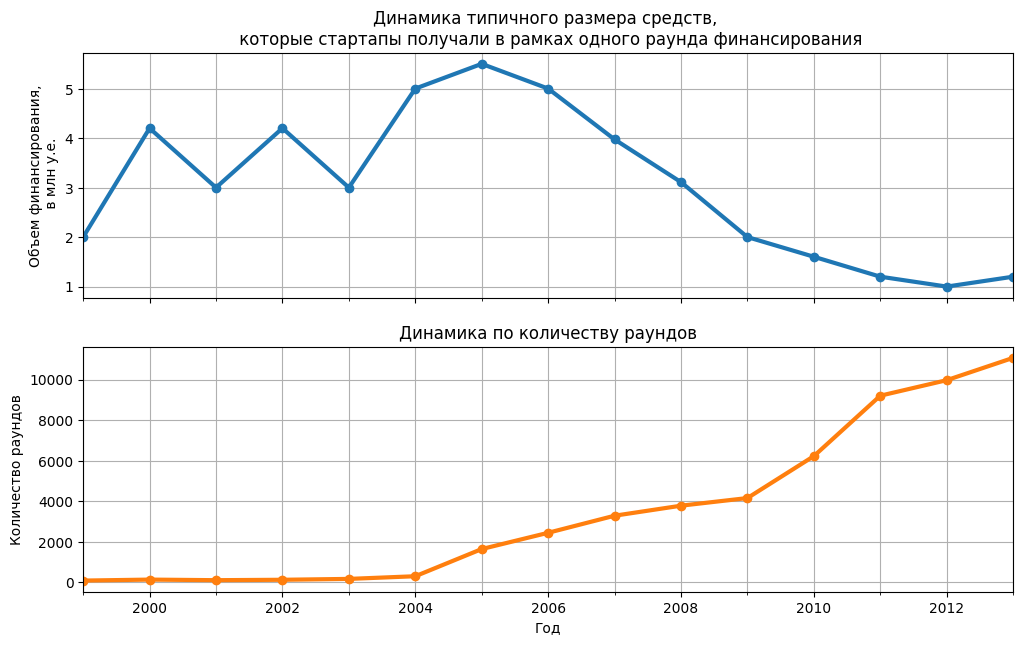

In [39]:
# Строим график
axes = table_finance.plot(kind='line', x='funded_at',y=['median', 'count'],
                          subplots=True, sharex=True, linewidth=3, figsize=(12, 7), marker='o', legend=False,
                          title=['Динамика типичного размера средств, \n которые стартапы получали в рамках одного раунда финансирования', 'Динамика по количеству раундов'])

# Настраиваем оформление графика
plt.xlabel('Год')

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Объем финансирования,\n в млн у.е.')
axes[1].set_ylabel('Количество раундов')

# Включаем сетку для каждого из подграфиков
axes[0].grid(which='both')
axes[1].grid(which='both')

# Выводим график
plt.show()

**В 2005 году типичный размер собранных в рамках одного раунда средств был максимален и составлял 5,5 млн у.е.  
2013 год лидирует по количеству раундов (11075), однако объем финансирования одного раунда один из самых низких (1,2 млн. у.е.) за 15 летний период.**

### Люди и их образование

**Финансовую компанию интересуют ответы на следующий вопрос:**
1. **Зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.**
2. **Насколько информация об образовании сотрудников полна.** 
3. **Возможно ли присоединить к данным ещё и таблицу `degrees.csv`.**

#### Подготовка данных для анализа полноты информации об образовании сотрудников
Объединим два датафрейма `people` и `education`. При этом будем использовать тип присоединения `outer`, чтобы не потерять данные из обоих датасетов. Предварительно переименуем столбец `id` датафрейма `people_df` в `person_id`, по которому и произведем присоединение. Такой способ поможет точнее оценить полноту данных.  
Напомним, что `people_df` содержит в 2 раза больше строк -  226709 строк, а `education_df` - 109610 строк. Одноименные столбцы `person_id` датафреймов содержат по 226708 и 68451 уникальных значений идентификаторов сотрудников соответственно. Это говорит о том, что в `education_df` для одного сотрудника может быть 2 или более записей об образовании. 

In [40]:
people_df.head(2)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN


In [41]:
education_df.head(2)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01


In [42]:
# Переименуем столбец 'id' в 'person_id'
people_df = people_df.rename(columns={'id':'person_id'})

In [43]:
# Соединяем данные в единый датафрейм
people_education_df = people_df.merge(education_df, on='person_id', how='outer')

In [44]:
people_education_df.head(10)

,person_id,first_name,last_name,company_id,network_username,id,instituition,graduated_at
0,2,Ben,Elowitz,4993.0,elowitz,699.0,"University of California, Berkeley",1994-01-01
1,2,Ben,Elowitz,4993.0,elowitz,700.0,"University of California, Berkeley",1994-01-01
2,3,Kevin,Flaherty,1.0,NaN,706.0,Washington University in St Louis,NaT
3,3,Kevin,Flaherty,1.0,NaN,707.0,Indiana University,NaT
4,4,Raju,Vegesna,3.0,NaN,NaN,NaN,NaT
5,5,Ian,Wenig,3.0,NaN,47870.0,The Aji Network,2005-01-01
6,5,Ian,Wenig,3.0,NaN,47871.0,McGill University,1986-01-01
7,6,Kevin,Rose,16441.0,kevinrose,15624.0,"University of Nevada, Las Vegas",NaT
8,6,Kevin,Rose,16441.0,kevinrose,69509.0,Montessori,1983-01-01
9,7,Jay,Adelson,4.0,jayadelson,22649.0,Boston University,1992-01-01


In [45]:
# Выводим статистику
people_education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268248 entries, 0 to 268247
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person_id         268248 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id                109610 non-null  float64       
 6   instituition      109555 non-null  object        
 7   graduated_at      58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 16.4+ MB


In [46]:
people_education_df['person_id'].nunique()

227088

**Объединенный датафрейм `people_education_df` содержит 268248 строк с информацией о 227088 людях (они же уникальные идентификаторы `person_id`).  
Обратим внимание, что в полученном датафрейме только у 44789 записей есть данные об id компании. И все выводы, которые будут сделаны далее будут основываться лишь на шестой части данных.**

#### Оценка полноты информации об образовании сотрудников
Используя полученный датафрейм `people_education_df`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

Сгруппируем данные по id компании `company_id` и для каждой получим количество сотрудников, количество указанных учреждений и количество завершенных обучений:

In [47]:
# Группируем данные и сбрасываем  индексы
agg_tab = people_education_df.groupby('company_id').agg({'person_id':'nunique', 'instituition':'count', 'graduated_at':'count'}).reset_index()
agg_tab

,company_id,person_id,instituition,graduated_at
0,1.0,2,2,0
1,2.0,1,1,1
2,3.0,3,4,3
3,4.0,13,17,14
4,5.0,61,68,35
...,...,...,...,...
22917,285897.0,2,2,1
22918,285953.0,1,0,0
22919,285972.0,2,1,0
22920,285996.0,1,1,0


In [48]:
# Выводим статистику
agg_tab.describe(percentiles=[0.75, 0.95, 0.99])

,company_id,person_id,instituition,graduated_at
count,22922.000000,22922.000000,22922.000000,22922.000000
mean,102688.472646,1.510121,1.248102,0.914144
std,84842.926930,2.764321,3.404330,2.281440
min,1.000000,1.000000,0.000000,0.000000
50%,70878.500000,1.000000,1.000000,0.000000
75%,174083.500000,1.000000,2.000000,1.000000
95%,262743.900000,4.000000,4.000000,3.000000
99%,279990.900000,8.000000,8.000000,6.000000
max,286091.000000,244.000000,300.000000,195.000000


Общеек количество компаний 22922.  
Количество сотрудников в компаниях варьируется от 1 до 244, причем штат как минимум 75% компаний состоит из 1 сотрудника. А 1% компаний имеет штат 8-244 сотрудника.

На ранннем этапе в стартапе участвует один человек (он же основатель), далее по мере развития идеи может возникнуть необходимость увеличивать штат сотрудников. По статистике большая часть стартапов насчитывает от 2 до 5 человек. Поэтому разобьем наши компании на группы по 1, 2, 3, 4 и 5 человек, а дальше укрупним группы:
- g1 с численностью 1 работник.
- g2 с численностью 2 работника.
- g3 с численностью 3 работника.
- g4 с численностью 4 работника.
- g5 с численностью 5 работников.
- g10 с численностью до 10 работников.
- g20 с численностью до 20 работников.
- g244 с численностью до 244 работников.

Проведем категоризацию компаний по численности сотрудников:

In [49]:
# Категоризация по количеству сотрудников
agg_tab['type_company'] = pd.cut(agg_tab['person_id'], bins=[0, 1, 2, 3, 4, 5, 10, 20, 244], labels=['g1', 'g2', 'g3', 'g4', 'g5','g10', 'g20','g244'])

Проверим количество компаний в каждой группе:

In [50]:
agg_tab['type_company'].value_counts()

type_company
g1      18117
g2       2709
g3        921
g4        450
g10       368
g5        237
g20        92
g244       28
Name: count, dtype: int64

In [157]:
# Группируем данные по типу компании
agg_tab_type_company = agg_tab.groupby('type_company', observed=False).agg({'person_id':'mean', 'instituition':'mean', 'graduated_at':'mean'})
agg_tab_type_company = agg_tab_type_company.reset_index()

#Переименование столбцов
agg_tab_type_company = agg_tab_type_company.rename(columns={'person_id':'avg_count_person', 'instituition':'avg_count_instituition', 'graduated_at': 'avg_count_graduation' })

# Новый столбец с долей сотрудников без указанного учреждения образования
agg_tab_type_company['share_instituition'] = (1 - agg_tab_type_company['avg_count_instituition'] / agg_tab_type_company['avg_count_person']) * 100

# Новый столбец с долей сотрудников без указанной даты конца обучения
agg_tab_type_company['share_graduation'] = (1 - agg_tab_type_company['avg_count_graduation'] / agg_tab_type_company['avg_count_person']) * 100

agg_tab_type_company

,type_company,avg_count_person,avg_count_instituition,avg_count_graduation,share_instituition,share_graduation
0,g1,1.000000,0.822266,0.645030,17.773362,35.497047
1,g2,2.000000,1.622001,1.215209,18.899963,39.239572
2,g3,3.000000,2.432139,1.730727,18.928701,42.309084
3,g4,4.000000,3.217778,2.177778,19.555556,45.555556
4,g5,5.000000,3.645570,2.476793,27.088608,50.464135
5,g10,7.239130,5.394022,3.423913,25.487988,52.702703
6,g20,13.260870,12.065217,6.652174,9.016393,49.836066
7,g244,51.714286,59.678571,33.678571,-15.400552,34.875691


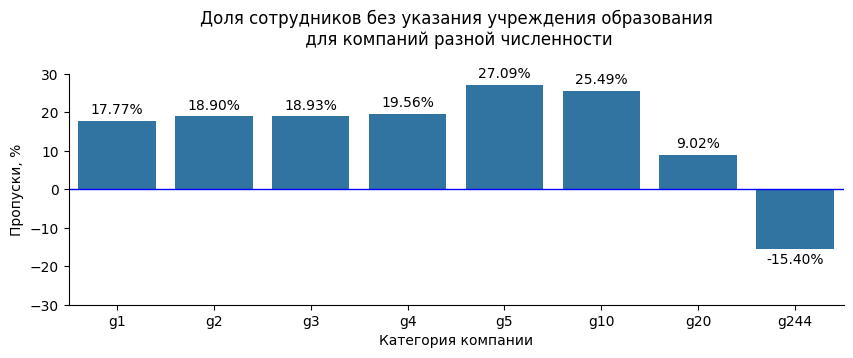

In [166]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим столбчатую диаграмму
bar_type_company = sns.barplot(data=agg_tab_type_company, x='type_company', y='share_instituition')

# Наносим на график линию 
plt.axhline(y=0, color='blue', linestyle='-', linewidth=1)

# Настраиваем оформление графика:
# Добавляем значения к барам
plt.bar_label(bar_type_company.containers[0], fmt='%.2f%%', padding=3)

# Укажем минимум и максимум по оси у
plt.ylim(-30, 30)

# Задаем подписи осей и название
plt.xlabel('Категория компании')
plt.ylabel('Пропуски, %')
plt.title('Доля сотрудников без указания учреждения образования\n для компаний разной численности\n')

# Убираем верхнюю и правую границы
bar_type_company.spines[['top','right']].set_visible(False)

# Выводим график
plt.show()

* Для предприятий с количеством сотрудников от 1 до 5 с увеличение числа сотрудников увеличивается доля пропусков в графе образование с 17,8% до 27,1%.
* Для предприятий из 6-10 сотрудников рост доля снижается до 25,5%, а для предприятий 11-20 сотрудников падает до 9%.
* Для предприятий с количеством сотрудников от 21 и выше доля уходит в минус, то есть 15,4% сотрудников получают/уже получили дополнительное образование.

#### Оценка возможности присоединения к таблицам ещё и таблицы `degrees.csv`

In [52]:
# Посмотрим первые строки
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [53]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [54]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


Датафрейм `degrees_df` содержит информацию о типе образования сотрудников и эти данные могли бы дополнить нашу общую таблицу. Осталось определить, по какому полю необходимо провести объединение. Возможны 2 варианта: по id записи и по id сотрудника.  
1. Рассмотрим вариант объединения по id сотрудника.  
Сделать это без дополнительного преобразования невозможно, поскольку поле с идентификатором сотрудников, по которому предполагается присоединение, имеет другую форму записи с приставкой 'p:'. После преобразования значений можно будет приступить к объединению. Однако, в случае если сотрудник имеет несколько записей об образовании в датафрейме `people_education_df` и несколько записей о типе образования в датафрейме `degrees_df` в результирующем датафрейме мы получим всевозможные комбинации учебного заведения и типа образования. Что конечно же будет ошибкой.
2. Вариант объединения по id записей.  
Из описания данных не понятно являются ли поле `id`  из `education_df` и поле `id`  из `degrees_df` ключами друг к другу или они определяют номер записи только в конкретной таблице.  
   Предположим, что по `id` действительно можно объединить датафреймы. Объединим и проверим совпадают ли идентификаторы сотрудников в каждой строчке.

In [55]:
# Находим подстроку 'p:' и заменяем ее на ничего 
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:','')

In [56]:
# Меняем тип данных на int
degrees_df['object_id'] = degrees_df['object_id'].astype('float64').astype('int64')

Объединяем два датафрейма `education_df` и `degrees_df` по полю `id`, чтобы не потерять данные используем тип присоединения `outer`:

In [57]:
# Объединям
education_degrees_df =  education_df.merge(degrees_df, on='id', how='outer' )
education_degrees_df.head()

,id,person_id,instituition,graduated_at,object_id,degree_type,subject
0,1,6117,NaN,NaT,6117,MBA,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01,6136,BA,"English, French"
2,3,6136,Boston University,1992-01-01,6136,MS,Mass Communication
3,4,6005,University of Greenwich,2006-01-01,6005,MS,Internet Technology
4,5,5832,Rice University,NaT,5832,BCS,"Computer Science, Psychology"


In [58]:
education_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
 4   object_id     109610 non-null  int64         
 5   degree_type   98389 non-null   object        
 6   subject       81298 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.9+ MB


После объединения количество строк не изменилось. Проверим, что совпадают идентификаторы сотрудников для каждой записи, то есть `person_id` совпадает с `object_id` в каждой строчки. Для этого найдем записи , для которых это не так:

In [59]:
education_degrees_df[education_degrees_df['person_id'] != education_degrees_df['object_id']]

,id,person_id,instituition,graduated_at,object_id,degree_type,subject


Таких записей не нашлось, значит данные объединились корректно.

Объединим датафрейм `education_degrees_df` с данными о сотрудниках `people_df` по полю с идентификаторами сотрудников: в `people_df` это поле `id` (ранее оно было переименовано в `person_id`) , в `education_degrees_df` это поле `person_id `. Чтобы не потерять данные о сотрудниках без образования используем тип присоединения `outer`:

In [60]:
# Объединям датафреймы
total_df =  people_df.merge(education_degrees_df, on='person_id', how='outer' )

In [61]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268248 entries, 0 to 268247
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person_id         268248 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id                109610 non-null  float64       
 6   instituition      109555 non-null  object        
 7   graduated_at      58054 non-null   datetime64[ns]
 8   object_id         109610 non-null  float64       
 9   degree_type       98389 non-null   object        
 10  subject           81298 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 22.5+ MB


In [62]:
total_df.nunique()

person_id           227088
first_name           28421
last_name           107771
company_id           22922
network_username     38421
id                  109610
instituition         21067
graduated_at            71
object_id            68451
degree_type           7147
subject              20050
dtype: int64

Объединенный датафрейм `total_df` содержит 268248 строк с информацией о 227088 людях (они же уникальные идентификаторы `person_id`).  Только у 44789 записей есть данные об id компании.  

**Для анализа полноты данных можно присоединить не 2, а 3 таблицы. Тогда кроме информации о названии учебного заведения и даты выпуска (в случае  объединения двух таблиц), дополнительно можно получить данные о типе образования и специальности.**

### Поля для объединения даннных
Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.   

Столбец `network_username` также встречается в нескольких датасетах. Но не ясно дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

**Финансовую компанию интересует ответ на следующий вопрос:**
1. **Возможно ли использовать столбец с именем `network_username` для объединения данных.**

#### Установим, подходит ли для объединения данных столбец `network_username`

Столбец  c именем `network_username` присутствует:
- в таблице, содержащей информацию о компаниях и раундах финансирования `company_and_rounds`. Согласно описанию содержит "информацию о никах компаний в сети".
- в таблице `people`, содержащей информацию о сотрудниках. Согласно описанию содержит "ник в социальных сетях";
- кроме того, в таблице `fund`, содержащей информацию о фондах. Согласно описанию содержит "ник фонда в сети".

Проверим есть ли повторяющиеся значения в столбцах `network_username` во всех  датафреймах. Для этого выгрузим списки уникальных значений столбцов, преобразуем их в множества и найдем мощность пересечений:

In [63]:
#Выгружаем уникальные значения столбца 'network_username' датафрейма company_df 
network_username_company = company_and_rounds_df['network_username'][company_and_rounds_df['network_username'].notna()].unique()

# Преобразовываем в список
network_username_company = list(network_username_company)

In [64]:
#Выгружаем уникальные значения столбца 'network_username датафрейма' people_df
network_username_people = people_df['network_username'][people_df['network_username'].notna()].unique()

# Преобразовываем в список
network_username_people = list(network_username_people)

In [65]:
#Выгружаем уникальные значения столбца 'network_username' датафрейма fund_df
network_username_fund = fund_df['network_username'][fund_df['network_username'].notna()].unique()

# Преобразовываем в список
network_username_fund = list(network_username_fund)

Найдем пересечения множеств значений столбцов и посчитаем их количество:

In [66]:
# Находим пересечение множеств значений 
my_set = set(network_username_company) & set(network_username_people) & set(network_username_fund)
print('Для столбцов 3-х датасетов `company_df`, `people_df` и `fund_df` существует ', len(my_set), ' повторяющихся значений')
my_set

Для столбцов 3-х датасетов `company_df`, `people_df` и `fund_df` существует  7  повторяющихся значений


{'boonseo',
 'dgillesfr',
 'priceride',
 'switchcommerce',
 'taniablackalln',
 'tefdigital',
 'yumedeals3'}

In [67]:
# Находим пересечение множеств значений 
my_set_1_2 = set(network_username_company) & set(network_username_people)
print('Для столбцов 2-х датасетов `company_df` и `people_df` существует ', len(my_set_1_2), ' повторяющихся значений')

Для столбцов 2-х датасетов `company_df` и `people_df` существует  2199  повторяющихся значений


In [68]:
# Находим пересечение множеств значений 
my_set_2_3 = set(network_username_people) & set(network_username_fund)
print('Для столбцов 2-х датасетов `people_df` и `fund_df` существует ', len(my_set_2_3), ' повторяющихся значений') 

Для столбцов 2-х датасетов `people_df` и `fund_df` существует  79  повторяющихся значений


In [69]:
# Находим пересечение множеств значений 
my_set_1_3 =  set(network_username_company) & set(network_username_fund)
print('Для столбцов 2-х датасетов `company_df` и `fund_df` существует ', len(my_set_1_3), ' повторяющихся значений')

Для столбцов 2-х датасетов `company_df` и `fund_df` существует  70  повторяющихся значений


Оформим в таблицу для удобства:

In [70]:
row_labels = ['company_and_rounds', 'people', 'fund', 'count_network_username']
my_data = {'company_and_rounds': [0, len(my_set_1_2), len(my_set_1_3), len(network_username_company)],
        'people': [len(my_set_1_2), 0,len(my_set_2_3), len(network_username_people)],
        'fund': [len(my_set_1_3),len(my_set_2_3),0, len(network_username_fund)]
    }

my_df = pd.DataFrame(data = my_data, index=row_labels)
my_df

,company_and_rounds,people,fund
company_and_rounds,0,2199,70
people,2199,0,79
fund,70,79,0
count_network_username,79571,38421,2098


**Как видно из полученных данных, значения `network_username` действительно повторяются в каждой таблице:**
- **70 значений username повторяются в таблице компаний и таблице фондов - это значит, что 70 компаний-стартапов со временем сами стали финансировать стартапы;**
- **79 значений username повторяются в таблице сотрудников и таблице фондов - это значит, что сотрудники являются основателями фондов;**
- **2199 значений username повторяются в таблице сотрудников и таблице компаний - это значит, что эти сотрудники являются основателями стартапов;**
- **7 значений username повторяются во всех трех таблицах - это значит, что эти сотрудники являются основателями стартапов и финансируют другие стартапы.**


**Таким образом, использовать столбец `network_username` для присоединения таблиц можно. При этом мы потеряем огромный объем данных, но вероятно сможем найти новую неочевидную информацию.**

### Причина возникновения пропусков `company_and_rounds`

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

**Задача:**
1. **Определить причины возникновения пропусков в  `company_and_rounds` и максимальным образом сохранив данные, их связность и исключив возможные возникающие при этом ошибки, привести данные в вид, который позволяет проводить анализ в разрезе отдельных компаний.**

In [71]:
# Настроим вывод всех столбцов датафрейма
pd.set_option('display.max_columns', None)

In [72]:
# посмотрим на датафрейм
company_and_rounds_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [73]:
# Переведем для удобства значения об объемах финансирования в миллионы
company_and_rounds_df[[
    'pre_money_valuation','raised_amount', 'funding_total']] = company_and_rounds_df[['pre_money_valuation', 'raised_amount', 'funding_total']] / 1000000

Проанализировав структуру датафрейма, можно заметить, что имеющийся датафрейм был образован соединением двух таблиц:   
- одна с данными о компаниях
- и другая - с данными о раундах.
  
Таблицы объединялись по полям `company_ID` и `company_id` с помощью параметра `full`, то есть в итоговую таблицу попали все строки из обеих таблиц. Именно такое объединение двух таблиц способствовало возникновению пропусков, которые затрудняют анализ.
 
Разделим датафрейм `company_and_rounds_df` на два `company_df` с данными о компаниях и `round_df` с данными о раундах:

In [74]:
company_df = company_and_rounds_df[['company_ID','name','category_code',
                                    'status','founded_at','closed_at','domain',
                                    'network_username','country_code', 'investment_rounds',
                                    'funding_rounds', 'funding_total', 'milestones']]
round_df = company_and_rounds_df[['company_id', 'funding_round_id','funded_at',
                                  'funding_round_type','raised_amount','pre_money_valuation',
                                  'participants','is_first_round','is_last_round']]

* Удалим дубликаты и строки с пропусками

In [75]:
print('Количество строк в company_df до удаления дубликатов и пустых строк: ', company_df.shape[0])
print('Количество строк в round_df до удаления дубликатов и пустых строк: ', round_df.shape[0])

Количество строк в company_df до удаления дубликатов и пустых строк:  217774
Количество строк в round_df до удаления дубликатов и пустых строк:  217774


In [76]:
# Удаляем строки с пропусками в поле с идентификатором компании в датафрейме company_df
company_df = company_df.drop_duplicates().dropna(subset=['company_ID'])
print('Строк в company_df после чистки: ', company_df.shape[0])

# Удаляем строки с пропусками в поле с идентификатором компании в датафрейме round_df
round_df = round_df.drop_duplicates().dropna(subset=['company_id'])
print('Строк в round_df после чистки: ', round_df.shape[0])

Строк в company_df после чистки:  196553
Строк в round_df после чистки:  52928


* Обработаем данные в `company_df`

In [77]:
#Выводим информацию о датафрейме
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

In [78]:
# Переименуем столбец 'company_ID' на 'company_id'
company_df = company_df.rename(columns = {'company_ID': 'company_id'})

In [79]:
# Преобразовываем к целочисленному типу идентификатор компании
company_df[['company_id']] = company_df[['company_id']].astype('int64')

# Преобразовываем к целочисленному типу инвестиционные раунды и раунды финансирования
company_df[['investment_rounds', 'funding_rounds']] = company_df[['investment_rounds', 'funding_rounds']].astype('int64')

# Преобразовываем к целочисленному типувехи финансирования
company_df[['milestones']] = company_df[['milestones']].astype('int64')

In [80]:
#Проверим количество  дубликатов по полю company_id
company_df['company_id'].duplicated().sum()

0

In [81]:
# Сбросим индекс
company_df = company_df.reset_index().drop('index', axis=1)

In [82]:
#Выводим информацию о датафрейме после перобразования
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int64         
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  int64         
 10  funding_rounds     196553 non-null  int64         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), 

* Обработаем данные в `round_df`

In [83]:
round_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  float64       
 1   funding_round_id     52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


In [84]:
# Преобразовываем к целочисленному типу идентификатор компании и раунда финансирования
round_df[['company_id', 'funding_round_id']] = round_df[['company_id', 'funding_round_id']].astype('Int64')

# Преобразовываем к целочисленному типу информацию является ли раунд первым или последним
round_df[['is_first_round', 'is_last_round']] = round_df[['is_first_round', 'is_last_round']].astype('Int64')

# Преобразовываем к целочисленному типу число участников
round_df[['participants']] = round_df[['participants']].astype('Int64')


In [85]:
# Сбросим индекс
round_df = round_df.reset_index().drop('index', axis=1)

In [86]:
#Выводим информацию о датафрейме после перобразования
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  Int64         
 1   funding_round_id     52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), float64(2), object(1)
memory usage: 3.9+ MB


**В результате преобразования получили два датафрейма:**
1. **`company_df`с данными о компаниях.**  
**Состоит из 196553 строк и 13 столбцов.**  
**Пропуски в полях:**
    * **`category_code`  73367 пропусков**
    * **`founded_at`   105326 пропусков**
    * **`closed_at`   193933 пропусков**
    * **`domain` 70008 пропусков**    
    * **`network_username` 115962 пропусков**       
    * **`country_code` 108563 пропусков**

<br>    

2. **`round_df` с данными о раундах.**  
**Состоит из 52928 строк и 9 столбцов.**  
**Поле c датой финансирования `funded_at` содержит 248 пропусков**


## Исследовательский анализ объединённых таблиц

### Фильтрация данных согласно заданным критериям

**Заказчика интересуют компаниии, у которых значения раунда финансирования и инвестиционного раунда больше нуля, а также компании имеющие статус "приобретенные".**

Из датафрейма `company_df`  выберем записи согласно заданным критериям, а именно: `funding_rounds` и `investment_rounds` больше нуля,  `status` имеет значение `acquired`

In [87]:
# Фильтруем датафрейм
company_filter_df = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]

In [88]:
# Сбрасываем индексы и уУдаляет колонку 'index', которая была создана при reset_index()
company_filter_df = company_filter_df.reset_index().drop('index', axis=1)
company_filter_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39.75,5
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.00,0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.00,4
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5.00,3
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.00,4


### Анализ выбросов
**Финансовую компанию интересует ответ на следующий вопрос:**
1. **Какой обычный размер средств предоставлялся компаниям в рамках рассматриваемого периода?**  

Подготовим данные о размере общего финансирования и графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

In [89]:
# Датафрейм с данными о размере общего финансирования
company_filter = company_filter_df[['funding_total']]
company_filter.head()

,funding_total
0,39.75
1,0.00
2,0.00
3,5.00
4,0.00


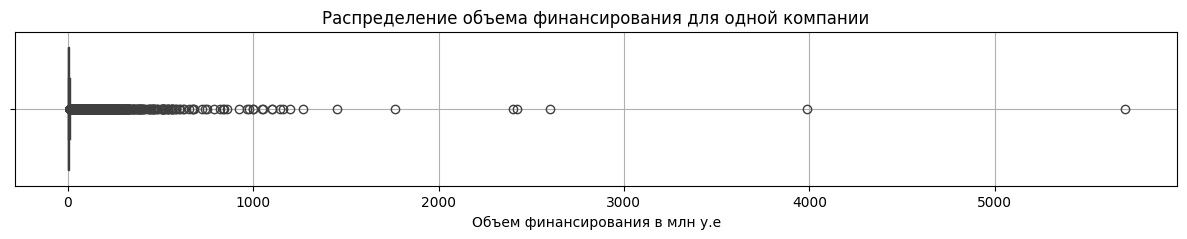

In [90]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 2))

# Строим горизонтальную диаграмму размаха
sns.boxplot(data=company_filter, x='funding_total')

# Добавляем заголовок и подписи
plt.title('Распределение объема финансирования для одной компании')
plt.xlabel('Объем финансирования в млн у.е')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

Большое количество выбросов не позволяет определить типичный объем финансирования. Рассмотрим диаграмму размаха без выбросов:

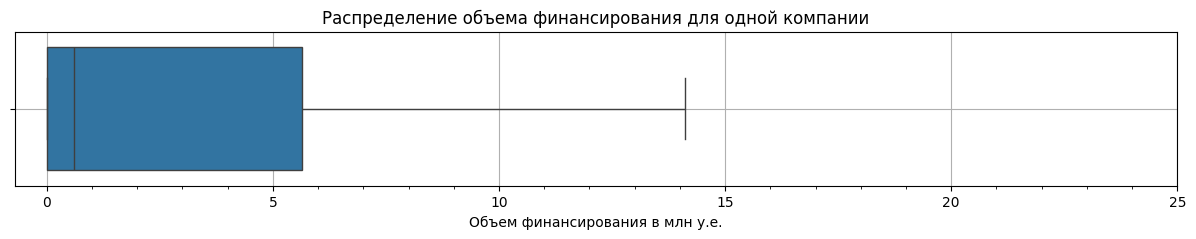

In [91]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 2))

# Строим горизонтальную диаграмму размаха без выбросов
g = sns.boxplot(data=company_filter, x='funding_total', showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение объема финансирования для одной компании')
plt.xlabel('Объем финансирования в млн у.е.')

# Добавляем сетку
plt.grid(True)
# Добавляем деления на ось
g.set_xticks(range(26), minor=True)
# Отображаем график
plt.show()

**Объемы финансирования превышающие ~14 млн.у.е относятся к аномальным. 50% компаний имеют объемы финансирования до ~5.5 млн.у.е., а типичный объем финансирования около ~0.6-0.7 млн.у.е.**

Определим точные значения и рассчитаем верхнюю границу выбросов:

In [92]:
#Выводим статистику
company_filter.describe()

,funding_total
count,40747.00000
mean,10.13561
std,56.46436
min,0.00000
25%,0.00000
50%,0.60000
75%,5.65065
max,5700.00000


In [93]:
# Найдем границу правого уса
data = company_filter['funding_total']
iqr = np.percentile(data, 75) - np.percentile(data, 25)
upper_lim = (np.percentile(data, 75) + 1.5 * iqr).round(1)
print('Верхний порог выбросов:', upper_lim, ' млн у.е.')

Верхний порог выбросов: 14.1  млн у.е.


**25% компаний имеет нулевой объем финансирования. Среднее значение (~10.1) сильно превышает медиану (0.6), что говорит о присутствии в данных экстремально высоких значений. Большое стандартное отклонение (56.5) говорит о том, что значения сильно отклоняются от среднего. На большое разнообразие указывает широкий размах данных (от 0 до 5700).
Типичное значение объема по всем данным составляет 0.6 млн у.е. А верхняя граница выбросов 14,1 млн у.е.**

**Однако такое усреднение не совсем корректно:**

1. **Компании могут отличаться по количеству раундов финансирования: 0, 1, 2 ..или 15, а от этого напрямую зависит общий объем финансирования.**
2. **Объем выделенных средств в рамках одного раунда также может существенно отличаться для компаний из разных категорий: одно дело компания по производству лежанок для животных, а другое - сложного медицинского оборудования.**
3. **Родина стартапа также может влиять на объем финансирования, ведь стоимости рабочей силы в разных странах могут различаться в разы: минимальная зарплата в Японии 6 долл. в час, а в Бангладеше - 0,09 долл. в час.**

   
**Таким образом, для более качественного определения типичного значения объема финансирования необходимо учитывать параметры компаний и для каждой группы типичное значение будет своё.**

### Исследование компаний, купленных забесплатно
**Финансовая компания просит:**
1. **Исследовать компании, которые были проданы за ноль или за один доллар, и с ненулевым общим объёмом финансирования.**  
2. **Рассчитать аналитически верхнюю и нижнюю границу выбросов для столбцу с общим объемом финансирования
и определить каким процентилям соответствуют границы.**

Данные о покупках хранятся в датафрейме `acquisition_df`. Найдем компаний, которые были куплены за 0 или за 1. Необходимо учесть, что компанию могли перепродать за 0 или за 1 у.е. не один раз, поэтому необходимо будет удалить дубликаты id:

In [94]:
# Фильтруем данные, оставляем один столбец с id
free_company = acquisition_df.loc[(acquisition_df['price_amount'] == 0) | (acquisition_df['price_amount'] == 1), ['acquired_company_id']]
#Выводим количество строк
free_company.shape[0]

6934

In [95]:
# Удалим дубликаты идентификаторов
free_company.drop_duplicates(inplace=True) 
#Выводим количество строк
free_company.shape[0]

6850

Дополним данные датафрейма `free_company` данными общего объема финансирования `funding_total` из `acquired_df`. Объединение произведем по столбцам с идентификаторами компаний и левым типом присоединения, чтобы сохранить только бесплатные компании. Далее произведем фильтрацию и оставим только те компании, у которых был ненулевой общий объём финансирования, то есть ненулевые значения в `funding_total`:

In [96]:
# Объединяем таблицы
free_company_rounds = free_company.merge(company_df[['company_id', 'funding_total']], left_on='acquired_company_id', right_on='company_id', how='left')	
#Выводим количество строк
free_company_rounds.shape[0]

6850

In [97]:
# Фильтруем данные
free_company_rounds = free_company_rounds[free_company_rounds['funding_total'] > 0]
#Выводим количество строк
free_company_rounds.shape[0]

1593

In [98]:
# Удаляем столбец 'company_id'
free_company_rounds = free_company_rounds.drop('company_id', axis=1)

In [99]:
free_company_rounds.head()

,acquired_company_id,funding_total
1,314,0.10
12,698,1.00
14,718,4.00
16,175,1.25
20,1582,7.00


In [100]:
print('Количество строк   : ', free_company_rounds.shape[0])
print('Количество компаний: ', free_company_rounds['acquired_company_id'].nunique())

Количество строк   :  1593
Количество компаний:  1593


Посмотрим на статистику распределения объемов финансирования для одной компании:

In [101]:
#Выводим статистику
free_company_rounds['funding_total'].describe()

count    1593.000000
mean       17.989939
std       145.312236
min         0.003750
25%         2.000000
50%         6.000000
75%        15.400000
max      5700.000000
Name: funding_total, dtype: float64

25% компаний имеет объем финансирования от 3750 у.е. до 2 млн у.е.  Среднее значение (~18) - искажено экстремальными значениями.  Типичное значение объема по всем данным составляет 6 млн у.е. Верхняя граница нормы - 15,4  млн у.е.  

Посмотрим на график распределения объемов финансирования для одной компании без выбросов:

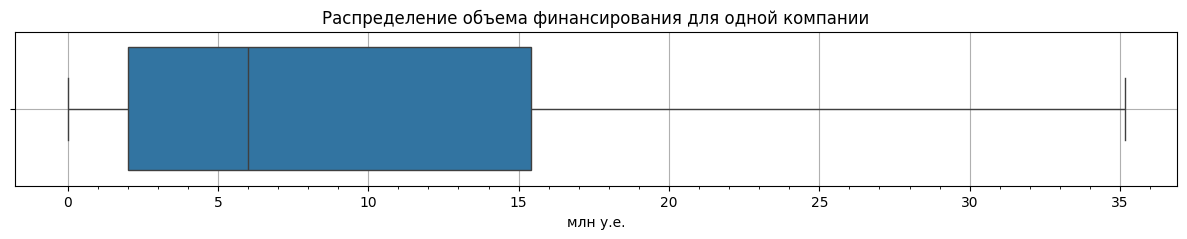

In [102]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 2))

# Строим горизонтальную диаграмму размаха
gr = sns.boxplot(data=free_company_rounds, x='funding_total', showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение объема финансирования для одной компании')
plt.xlabel('млн у.е.')

# Добавляем сетку
plt.grid(True)
# Добавляем деления на ось
gr.set_xticks(range(37), minor=True)
# Отображаем график
plt.show()

In [103]:
# Найдем верхнюю и нижнюю границы выбросов
data = free_company_rounds['funding_total']
iqr = np.percentile(data, 75) - np.percentile(data, 25)
lower_lim = (np.percentile(data, 25) - 1.5 * iqr)
upper_lim = (np.percentile(data, 75) + 1.5 * iqr)
print('Нижний порог выбросов:', max(0,lower_lim), ' млн у.е.')
print('Верхний порог выбросов:', upper_lim, ' млн у.е.')

Нижний порог выбросов: 0  млн у.е.
Верхний порог выбросов: 35.5  млн у.е.


Найдем какому процентилю соответствует верхняя граница выбросов. Для этого отсортируем значения в порядке возрастания, ограничим значения верхним порогом, количество ограниченных значений разделим на общее количество значений минус 1. 

In [104]:
# Сортируем значения `funding_total` в порядке возрастания
tab_1 = free_company_rounds['funding_total'].sort_values().reset_index()

#Оставляем все значения не превышающие верхнего порога
tab_2 = tab_1[tab_1['funding_total'] <= upper_lim]

#Находим процентиль
print('Верхняя граница выбросов соответствует процентилю:')
tab_2.shape[0] / (tab_1.shape[0] -1) * 100

Верхняя граница выбросов соответствует процентилю:


91.08040201005025

In [105]:
# Проверим результат расчетов
np.percentile(data, 91.08)

35.795840000000005

Верхний порог выбросов составляет 35,5 млн у.е. - это значение соответствует 91,08 процентилю. Нижний порог меньше минимального значения 0.003750, значит нижных выбросов нет.

**Покупка за 0 вероятно означает, что со временем инвестор получает контрольный пакет в стартапе взамен на финансирование проекта. При этом не каждый раунд финансирования подразумевает финансирование деньгами, инвестор может консультировать основателя стартапа, может предоставить доступ к важной информации, предоставить возможность воспользоваться услугами своих специалистов и т.д. - это может объяснить нулевые значение в поле `raised amount`.  
91% компаний имеют объем финансирования от 3750 у.е. до 35,79 млн у.е.**

### Цены стартапов по категориям
Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов.  

**Финансовая компания просит:**
1. **Среди категорий стартапов выделить категории стартапов, характеризующиеся: наибольшими ценами и наибольшим разбросом цен за стартап.**

#### Подготовка данных

Объединим данные о покупках компаний `price_amount` из таблицы `acquisition_df` с категориями компаний `category_code` из таблицы`company_id`. При этом учтем, что не для всех компаний указана их категория, поэтому в итоговой таблице могут появиться пропуски. И одна и та же компания может быть продана не один раз, то есть id компаний могут повторяться.  
Из таблицы `acquisition_df` возьмем два столбца: id компании и цена покупки.  
Из таблицы `company_id` возьмем два столбца: id компании и категорию компании.

In [106]:
# Создаем новую таблицу левым присоединением, чтобы учесть только компании с указанной стоимостью
tab_acquisition_category = acquisition_df[['acquired_company_id', 'price_amount']].merge(company_df[['company_id', 'category_code']], left_on='acquired_company_id', right_on='company_id', how='left')
# Количество строк новой таблицы
tab_acquisition_category.shape[0]

9407

In [107]:
#Количество пропусков в столбцах
tab_acquisition_category.isna().sum()

acquired_company_id       0
price_amount              0
company_id               17
category_code          2834
dtype: int64

In [108]:
#Количество уникальных id компаний
tab_acquisition_category['acquired_company_id'].nunique()

9264

Как было сказано выше, не для всех компаний указана категория, информация отсутствует для 2834 компаний. Для 30% проданных компаний мы не знаем категорию. Информация о 17 проданных компаниях отсутствует в `company_df`. Есть повторы `acquired_company_id`

In [109]:
# Удаляем один столбец с идентификатором
tab_acquisition_category = tab_acquisition_category.drop('company_id', axis=1)

In [110]:
#Удаляем строки с пропусками
tab_acquisition_category.dropna(inplace=True)

In [111]:
#Суммарное количество пропусков
tab_acquisition_category.isna().sum().sum()

0

In [112]:
#Количество уникальных id компаний
tab_acquisition_category['acquired_company_id'].nunique()

6452

In [113]:
#Отфильтруем строки с нулевой и единичной стоимостью
tab_acquisition_category = tab_acquisition_category[tab_acquisition_category['price_amount'] > 1]

In [114]:
#Сбросим индексы
tab_acquisition_category = tab_acquisition_category.reset_index().drop('index', axis=1)

In [115]:
#Посмотрим статистику
tab_acquisition_category.describe()

,acquired_company_id,price_amount
count,1997.000000,1.997000e+03
mean,55275.667501,1.792308e+09
std,74385.237805,5.819986e+10
min,4.000000,1.100000e+01
25%,12421.000000,2.000000e+07
50%,29451.000000,7.400000e+07
75%,51084.000000,3.080000e+08
max,286176.000000,2.600000e+12


Максимальная стоимость стартапа достигает 2,6 триллионов у.е., а медианное - нескольких десятков миллионов. Для комфортной работы переведем значения в миллиарды:

In [116]:
#Стоимость компании переведем в миллиарды
tab_acquisition_category['price_amount'] = tab_acquisition_category['price_amount'] / 1000000000

In [117]:
# Переименуем столбцы
tab_acquisition_category.columns = ['acquired_company_id', 'price_billion', 'category_company']

In [118]:
#Посмотрим на таблицу
tab_acquisition_category

,acquired_company_id,price_billion,category_company
0,10,0.0200,games_video
1,72,0.0600,mobile
2,132,0.2800,music
3,155,0.1000,web
4,215,0.0250,web
...,...,...,...
1992,283148,0.2000,network_hosting
1993,285969,2.5000,cleantech
1994,285995,0.2220,biotech
1995,286176,0.0524,hospitality


Первоначальная таблица содержала информацию о 9407 компаниях. После обработки данных осталось 1997 компаний. Последующий анализ будет проведен лишь на 21% исходных данных. Результаты могут быть очень ненадежными.

In [119]:
#Сгруппируем данные по категориям и рассчитаем среднее, медиану, размах и стандартное отклонение
tab_max_price = tab_acquisition_category.groupby('category_company').agg(
    {'price_billion':['mean', 'median', lambda x: x.max() - x.min(), 'std']}
)

In [120]:
# Удалим нулевой уровень мультииндекса
tab_max_price = tab_max_price.droplevel(0,axis=1)
# Переименуем столбцы
tab_max_price.columns = ['mean_price_billion', 'median_price_billion', 'range_price_billion', 'std_price_billion']
tab_max_price

,mean_price_billion,median_price_billion,range_price_billion,std_price_billion
category_company,,,,
advertising,0.259670,0.06000,3.099990,0.495484
analytics,0.181000,0.20000,0.183000,0.092968
automotive,2.547667,2.40000,5.157000,2.581669
biotech,0.735915,0.20000,19.999891,1.968195
cleantech,0.482316,0.18500,3.749550,0.874420
consulting,0.293672,0.03215,5.749600,1.018109
ecommerce,0.241516,0.15750,1.250000,0.281426
education,0.133315,0.01625,0.720800,0.288329
enterprise,22.959546,0.05475,2599.999980,241.358098


In [121]:
#Посмотрим статистику
tab_max_price.describe()

,mean_price_billion,median_price_billion,range_price_billion,std_price_billion
count,37.000000,37.000000,37.000000,35.000000
mean,1.097954,0.202038,75.313301,7.899841
std,3.729115,0.397564,426.651397,40.641209
min,0.016140,0.004860,0.000000,0.062953
25%,0.187500,0.055500,0.314500,0.284877
50%,0.375540,0.100000,3.099990,0.695441
75%,0.602896,0.185000,6.498500,1.348957
max,22.959546,2.400000,2599.999980,241.358098


Изначальное количество категорий компаний - 42. Наши данные содержат только 37.

#### Выделим категории стартапов, характеризующиеся наибольшими ценами

- Сравним типичную стоимость стартапов каждой категории с медианным значением по всем категориям:

In [122]:
# Выбираем данные
t = tab_max_price['median_price_billion'].reset_index()
# Отфильтруем значения превышающие медианное и отсортируем по убыванию
t_median = t[t['median_price_billion'] > t['median_price_billion'].median()].sort_values(by='median_price_billion', ascending = False)
# Сбросим индексы 
t_median.reset_index().drop('index', axis=1)

,category_company,median_price_billion
0,automotive,2.4000
1,sports,0.6225
2,nanotech,0.5840
3,real_estate,0.4000
4,manufacturing,0.3510
5,transportation,0.2300
6,biotech,0.2000
7,analytics,0.2000
8,fashion,0.1950
9,cleantech,0.1850


Получаем 17 категорий стартапов, типичная стоимость которых превышает медианное значение по всем категориям.

- Сравним типичную стоимость стартапов каждой категории со средним значением по всем категориям. Поскольку среднее реагирует на высокие значения, то границы будет смещена и выборка уменьшится:

In [123]:
# Отфильтруем значения превышающие медианное
t_mean = t[t['median_price_billion'] > t['median_price_billion'].mean()].sort_values(by='median_price_billion', ascending = False)
# Сбросим индексы 
t_mean.reset_index().drop('index', axis=1)

,category_company,median_price_billion
0,automotive,2.4000
1,sports,0.6225
2,nanotech,0.5840
3,real_estate,0.4000
4,manufacturing,0.3510
5,transportation,0.2300


- Можно уменьшить список и предложить инвесторам стартапы, стоимости которых существенно отличаются от остальных, то есть те значения, которые относятся к выбросам.

In [124]:
# Найдем границу выброса
iqr = np.percentile(tab_max_price[['median_price_billion']], 75) - np.percentile(tab_max_price[['median_price_billion']], 25)
limit_seats = (np.percentile(tab_max_price[['median_price_billion']], 75) + 1.5 * iqr).round(2)
print('Верхний порог выбросов:', limit_seats)

Верхний порог выбросов: 0.38


In [125]:
t_max = t[t['median_price_billion'] > limit_seats].sort_values(by='median_price_billion', ascending = False)
t_max.reset_index().drop('index', axis=1)

,category_company,median_price_billion
0,automotive,2.4000
1,sports,0.6225
2,nanotech,0.5840
3,real_estate,0.4000


В этом случае список будет состоять из 4 категорий категорий стартапов.

**Итак, есть список из 17 категорий стартапов, типичная стоимость которых превышает медианное значение. Из них первые  6 категорий со стоимость выше средней, а первые 4 со стоимостью существенно отличающейся от остальных:**

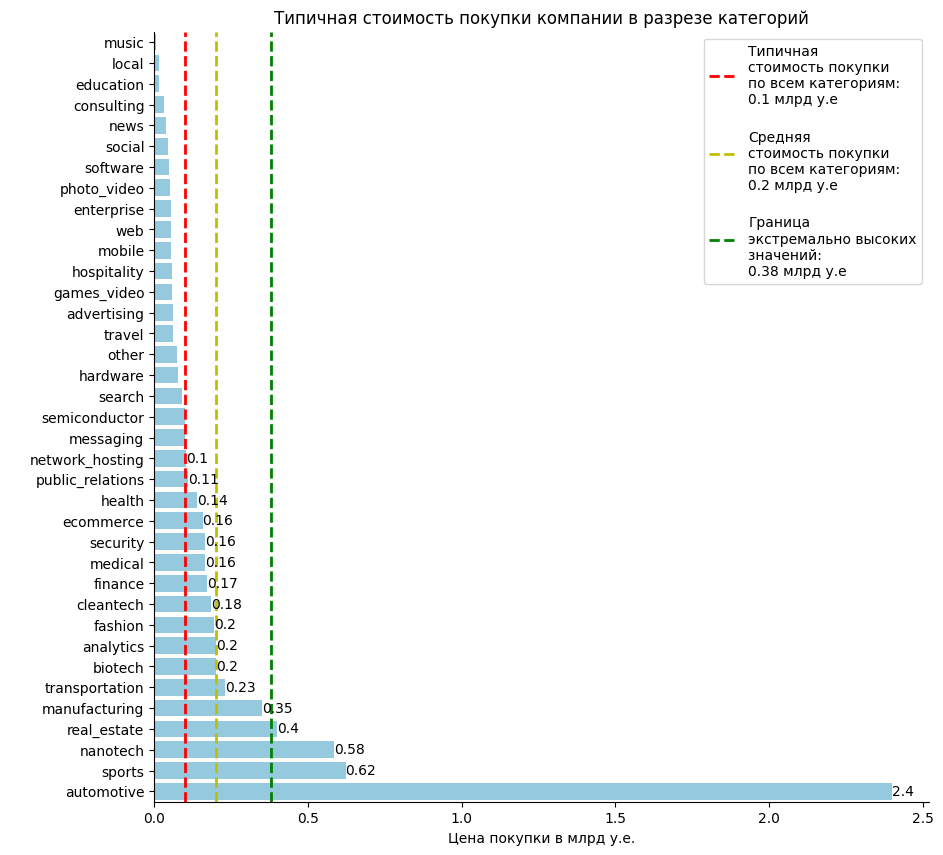

In [126]:
# Подготовим данные
data = tab_max_price['median_price_billion'].sort_values().reset_index()

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10,10))

# Строим столбчатую диаграмму
bar_1 = sns.barplot(data=data, x='median_price_billion', y='category_company', color='skyblue')

# Рассчитываем медианное значение по всем данным
median_1 = tab_max_price['median_price_billion'].median()
# Рассчитываем среднее значение по всем данным
mean_1 = tab_max_price['median_price_billion'].mean()

# Наносим на график линию с медианным значением
plt.axvline(median_1, color='red', linestyle='--', linewidth=2,
            label=f'Типичная\nстоимость покупки\nпо всем категориям: \n{median_1} млрд у.е')
plt.axvline(mean_1, color='y', linestyle='--', linewidth=2,
            label=f'\nСредняя\nстоимость покупки\nпо всем категориям: \n{round(mean_1,2)} млрд у.е')
plt.axvline(limit_seats, color='green', linestyle='--', linewidth=2,
            label=f'\nГраница\nэкстремально высоких\nзначений: \n{limit_seats} млрд у.е')

# Настраиваем оформление графика:
# Добавляем значения к барам, превышающим медиану
for i in range(data.shape[0]):
    if data.iloc[i, 1] > median_1:
        plt.annotate(round(data.iloc[i, 1], 2), xy=(data.iloc[i, 1], data.iloc[i, 0]), ha='left', va='center')

# Задаем подписи осей и название
plt.ylabel(' ')
plt.xlabel('Цена покупки в млрд у.е.')
plt.title('Типичная стоимость покупки компании в разрезе категорий')
plt.legend(loc=1)

# Убираем верхнюю и правую границы
bar_1.spines[['top','right']].set_visible(False)

# Выводим график
plt.show()

#### Выделим категории стартапов, характеризующиеся наибольшим разбросом цен за стартап:

In [127]:
# Сортируем данные разброса цен
data_2 = tab_max_price['std_price_billion'][tab_max_price['std_price_billion'].notna()].sort_values(ascending=False).reset_index()

# Округлим значения
data_2['std_price_billion'] = data_2['std_price_billion'].round(3)

data_2.head()

,category_company,std_price_billion
0,enterprise,241.358
1,public_relations,6.854
2,real_estate,2.676
3,automotive,2.582
4,other,2.073


- Cтартапы, разброс стоимости которых превышает медианное значение:

In [128]:
# Выбираем данные
r = data_2[['category_company', 'std_price_billion']].reset_index().drop('index', axis=1)

In [129]:
# Рассчитываем медианное значение по всем данным
median_2 = tab_max_price['std_price_billion'].median()
print('Медиана стандартного отклонения по всем данным:', round(median_2, 3))

Медиана стандартного отклонения по всем данным: 0.695


In [130]:
# Фильтруем
r_median = r[r['std_price_billion'] > median_2]
r_median

,category_company,std_price_billion
0,enterprise,241.358
1,public_relations,6.854
2,real_estate,2.676
3,automotive,2.582
4,other,2.073
5,biotech,1.968
6,health,1.927
7,games_video,1.463
8,security,1.378
9,mobile,1.319


Получаем 17 категорий с разбросом стоимости превышающей медианное значение.

- Cтартапы, разброс стоимости которых превышает среднее значение:

In [131]:
# Рассчитываем среднее значение по всем данным
mean_2 = tab_max_price['std_price_billion'].mean()
print('Среднее значение стандартного отклонения по всем данным:', round(mean_2, 3))

Среднее значение стандартного отклонения по всем данным: 7.9


In [132]:
# Фильтруем
r_mean = r[r['std_price_billion'] > mean_2]
r_mean

,category_company,std_price_billion
0,enterprise,241.358


Среднее значение стандартного отклонения по всем данным очень большое из-за присутствия в данных очень высокого максимального значения, поэтому в списке 1 категория.

- Cтартапы, разброс стоимости которых существенно отличаются от остальных, то есть те значения, которые относятся к выбросам:

In [133]:
# Найдем границу правого уса
iqr_2 = np.percentile(data_2[['std_price_billion']], 75) - np.percentile(data_2[['std_price_billion']], 25)
limit_seats_2 = (np.percentile(data_2[['std_price_billion']], 75) + 1.5 * iqr_2).round(2)
print('Верхний порог выбросов:', limit_seats_2)

Верхний порог выбросов: 2.94


In [134]:
r_max = r[r['std_price_billion'] > limit_seats_2]
r_max

,category_company,std_price_billion
0,enterprise,241.358
1,public_relations,6.854


2 категории с самыми большими разбросами.

**Итак, есть список из 17 категорий стартапов, с разбросом стоимости которые превышают медианное значение. Из них первые 2 категорий с экстремальными разбросами стоимостей.**

#### Выделим категории стартапов, характеризующиеся наибольшей стоимостью и  разбросом цен за стартап:

Чтобы получить список из максимальных значений и по цене и по разбросу можно поступить 2 способами:  
1. ограничить значения медианами
2. ограничить стоимость стартапа средним значением, а разброс - медианой.
3. в остальных случаях пересечений мы не получим.

Отфильтруем значения в таблице `tab_max_price`:  для стоимости стартапа `median_price_billion` возьмем среднее, а для разброса `std_price_billion` - медиану:

In [135]:
tab_max_price[['median_price_billion', 'std_price_billion']][(tab_max_price['median_price_billion'] > mean_1)\
    & (tab_max_price['std_price_billion'] > median_2)] 

,median_price_billion,std_price_billion
category_company,,
automotive,2.400,2.581669
manufacturing,0.351,1.060435
real_estate,0.400,2.676302


**Получаем скромный список из 3 категорий, в который попало максимальное значение стоимости стартапа при этом значения разброса не самые высокие. Как отмечалось ранее, результаты могут быть очень ненадежными.**

Отфильтруем значения в таблице `tab_max_price`:  для стоимости стартапа `median_price_billion` и разброса `std_price_billion` возьмем медианы:

In [136]:
tab_max_price[['median_price_billion', 'std_price_billion']][(tab_max_price['median_price_billion'] > median_1)\
    & (tab_max_price['std_price_billion'] > median_2)] 

,median_price_billion,std_price_billion
category_company,,
automotive,2.4000,2.581669
biotech,0.2000,1.968195
cleantech,0.1850,0.874420
finance,0.1715,1.052920
health,0.1400,1.927100
manufacturing,0.3510,1.060435
public_relations,0.1100,6.854338
real_estate,0.4000,2.676302
security,0.1645,1.378442


**Этот список обширнее, здесь 9 позиций категорий. + Сюда попала одна категория с одним из максимальных значений разброса. Данные более разнообразны, есть из чего выбрать. Но, результаты могут быть очень ненадежными.**

### Количество раундов стартапа перед покупкой
**Финансовая компания просит:**
1. **Проанализировать поле с количеством раундов и определить типичное значение количества раундов для каждого возможного статуса стартапа.**

Используем  датасета `company_filter_df` содержащий компании, у которых значения `funding_rounds` или `investment_rounds` больше нуля, и компании со статусом `acquired`.

In [137]:
company_filter_df['funding_rounds'].value_counts(normalize=True).round(4) * 100

funding_rounds
1     50.39
0     22.19
2     15.07
3      6.53
4      2.98
5      1.47
6      0.61
7      0.36
8      0.16
9      0.11
10     0.06
11     0.02
13     0.01
12     0.01
15     0.00
14     0.00
Name: proportion, dtype: float64

Столбец на 22% состоит из 0, значит раундов инвестирования для 22% компаний не было.  
Больше половины компаний имеют по 1 раунду,  
15% компаний по 2 раунда,  
почти 11% компаний с 3-5 раундами,  
а компаний с количеством раундов от 6 до 14 составляем менее  1,5 %

Посмотрим распределение раундов среди всех статусов компаний:

In [138]:
# Группируем по статусам
tab_rounds = company_filter_df.groupby('status').agg({'funding_rounds':['count', 'min', 'max', 'median','mean']})
tab_rounds = tab_rounds.droplevel(0,axis=1)
tab_rounds

,count,min,max,median,mean
status,,,,,
acquired,9394,0,12,0.0,0.523526
closed,2092,0,8,1.0,1.381453
ipo,640,0,13,1.0,1.934375
operating,28621,0,15,1.0,1.522658


Посмотрим как распределяется количество раундов для компаний со статусом 'acquired':

In [139]:
# Распределение количества раундов для компаний со статусом 'acquired'
company_filter_df['funding_rounds'][company_filter_df['status']=='acquired'].value_counts(normalize=True).round(4) * 100

funding_rounds
0     72.40
1     14.49
2      6.62
3      3.69
4      1.60
5      0.62
6      0.28
7      0.18
8      0.07
9      0.02
11     0.01
10     0.01
12     0.01
Name: proportion, dtype: float64

In [140]:
#Выбираем данные
data_3 = tab_rounds[['mean']].round(0)
data_3 = data_3.reset_index()

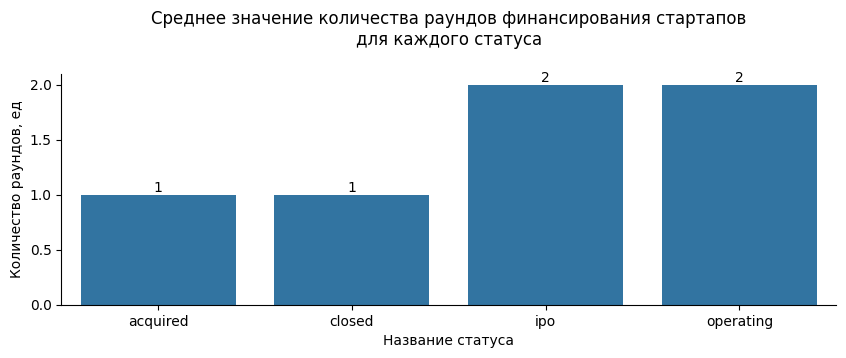

In [141]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим столбчатую диаграмму
bar_3 = sns.barplot(data=data_3, x='status', y='mean')

# Настраиваем оформление графика:
# Добавляем значения к барам
plt.bar_label(bar_3.containers[0])


# Задаем подписи осей и название
plt.xlabel('Название статуса')
plt.ylabel('Количество раундов, ед')
plt.title('Среднее значение количества раундов финансирования стартапов\nдля каждого статуса\n')


# Убираем верхнюю и правую границы
bar_3.spines[['top','right']].set_visible(False)


# Выводим график
plt.show()

**Типичное количество раундов: `acquired` - 0; `closed` - 1; `ipo` - 1; `operating` - 1.  А вот средние значения завышены для каждого статуса, кроме `closed`.**  

**Учитывая, что распределение статусов неоднородно: компаний с `ipo` - 640 , `operating` - 28621, `acquired` - 9394, `closed` - 2092, доверять видимо можно только значениям для `operating`. Полученым результатам по остальным статусам, включая статус `acquired` доверять стоит очень осторожно.**

## Итоговый вывод и рекомендации

**Основная цель исследования заключалась в подготовке исходных данных к анализу, а также в получении ответов на ряд вопросов заказчика.**

**В ходе исследования проанализированы исторические данные стартапов и их финансирование, сотрудников компаний и их образование, а также продажи стартапов. Результаты исследовани должны помочь заказчику выработать понимание, какие данные могут быть полезны для разработки модели бизнеса.**

<b>
В процессе работы сделаны следующие выводы:  
    
1. Для анализа было предложено 5 датафреймов. Они содержат много пропусков, что может доставить некоторые трудности при анализе. Данных достаточно, но при анализе данных столбцов с большим количеством пропусков и интерпретации результатов необходимо делать оговорку на объем исходных данных.  
    
2. В 2005 году типичный размер собранных в рамках одного раунда средств был максимален и составлял 5,5 млн у.е.  
2013 год лидирует по количеству раундов (11075), однако объем финансирования одного раунда один из самых низких (1,2 млн. у.е.) за 15 летний период.
   
4. Для предприятий с количеством сотрудников от 1 до 5 с увеличением числа сотрудников увеличивается доля пропусков в графе образование с 17,8% до 27,1%. Для предприятий из 6-10 сотрудников рост доля снижается до 25,5%, а для предприятий 11-20 сотрудников падает до 9%. Для предприятий с количеством сотрудников от 21 и выше доля уходит в минус, то есть 15,4% сотрудников получают/уже получил еще одно образование.

6. Для анализа данных можно объединить  `education_df`, `degrees_df` и `people_df`. Тогда кроме информации о названии учебного заведения и даты выпуска (в случае объединения двух таблиц), дополнительно можно получить данные о типе образования и специальности.

7. Использовать или нет столбец `network_username` для присоединения таблиц зависит от целей. Если тредуется определить основателей стартапов или найти тех, кто в последствии сами стали инвесторам, то можно. В противном случае, потеряется большой объем информации.

8. Среди купленных компаний и среди компаний с ненулевыми раундами финансирования, типичное значение объема финансирования составляет 0.6 млн у.е. А верхняя граница выбросов 14,1 млн у.е. Однако такое усреднение не совсем корректно. Для более качественного определения типичного значения объема финансирования необходимо учитывать различные параметры компаний, например количество раундов, категория  и т.д., и для каждой группы типичное значение будет своё.

9. 1593 компании были проданы за 0 или 1 у.е. Это означает, что со временем инвестор получает контрольный пакет в стартапе взамен на финансирование проекта. Типичное значение объема финансирование составляет 6 млн у.е.. 91% компаний имеет объем финансирования от 3750 у.е. до 35,5 млн у.е.. Верхний порог выбросов составляет 35,5 млн у.е. - это 91,08 процентилю. Нижных выбросов нет.

10. Для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов можно предложить следующие категории стартапов с наибольшими ценами и значительным разбросом цен: automotive, manufacturing, real_estate. При этом выводы основаны на 21% исходных данных, поэтому результаты могут быть очень ненадежными.

11. Типичное количество раундов для статуса `acquired` - 0, однако для проданных компаний оно может достигать 12. 72,5% компаний имеют 0 раундов и всего 14,5% по 1, остальные 13%  от 2 до 12 раундов. Поэтому среднее значение раундов - 1.    
Типичное количество раундов для статуса `closed` - 1 и совпадает со средним значением.    
Типичное количество раундов для статусов `ipo` - 1; `operating` - 1, при этом средние значения для них - 2  
<b>

--------------------